# Life expectancy and GDP of six countries : is there any correlation? #

Codecademy offered a new challenge : to explore, examine, analyze and explain a dataset with multiple data visualisations. With a dataset including the life expectancy at birth and the gross domestic product (GDP) of six countries (Chile, China, Germany, Mexico, United States of America and Zimbabwe) over 16 years, this project analyzes the evolution of life expectancy, the evolution of GDP and their correlation to each other. 

Before we dive in, it is important to note how limited our data is: 
- We only have one dataset.
- This dataset is limited to only 6 countries.
- This dataset does not include data from the last 10 years.

Knowing these weaknesses, this project only intends to explore, visualize and analyze the dataset. Any meaningful conclusions would need further research. 

In [548]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [550]:
#Import the dataset
df = pd.read_csv('all_data.csv')
df = df.rename(columns={'Life expectancy at birth (years)': 'Expectancy'})

## Life expectancy at birth ##
Let's first explore the information regarding the life expectancy at birth from the years 2000 to 2015. 

In [552]:
#Printing the mean, minimum and maximum of the column "Life expectancy at birth" from every country
print('Life expectancy at birth, in years')
print(df.groupby('Country')['Expectancy'].describe().drop(['count','25%', '50%', '75%', 'std'], axis=1))

Life expectancy at birth, in years
                              mean   min   max
Country                                       
Chile                     78.94375  77.3  80.5
China                     74.26250  71.7  76.1
Germany                   79.65625  78.0  81.0
Mexico                    75.71875  74.8  76.7
United States of America  78.06250  76.8  79.3
Zimbabwe                  50.09375  44.3  60.7


In this first exploration of the data, we can observe the mean, the minimum and the maximum of the life expectancy at birth of the six countries present in the dataset. Already, we can see which countries have longer or shorter life expectancy, but what I'm most curious about is their evolution throughout the years. Zimbabwe has the biggest difference from their minimum to their maximum life expectancy, meaning it has changed the most, even though it stayed at the lowest of the six countries'. Let's visualize the different countries' life expectancy throughout the years.

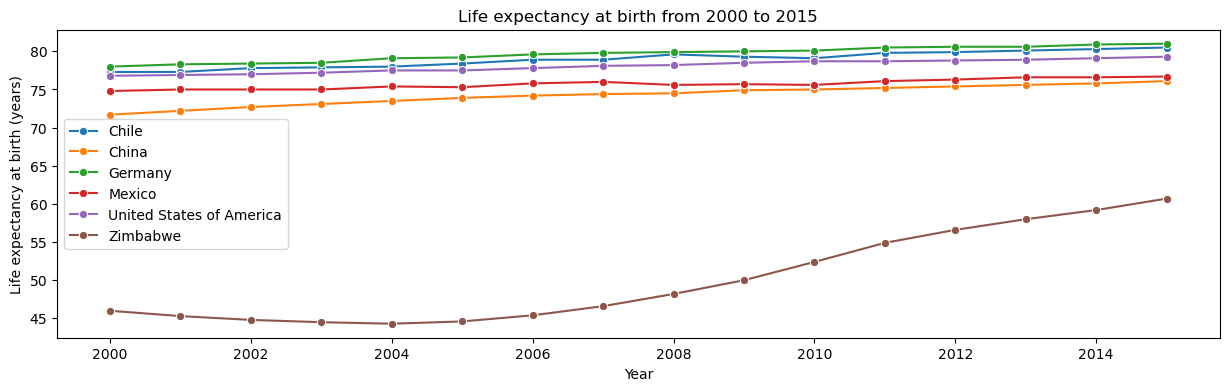

<Figure size 640x480 with 0 Axes>

In [554]:
#Creating a line graph for life expectancy by countries
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x='Year', y='Expectancy', hue='Country', marker='o')
plt.title('Life expectancy at birth from 2000 to 2015')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(loc=6)
plt.show()
plt.clf()

In this figure, we can clearly observe how much shorter Zimbabwe's life expectancy is, but also how quickly it grew. The other countries' life expectancy seem to have also evolve, though in a more slow, constant curve. Let's observe these countries from a closer point of view, without the extreme outlier that is Zimbabwe. 

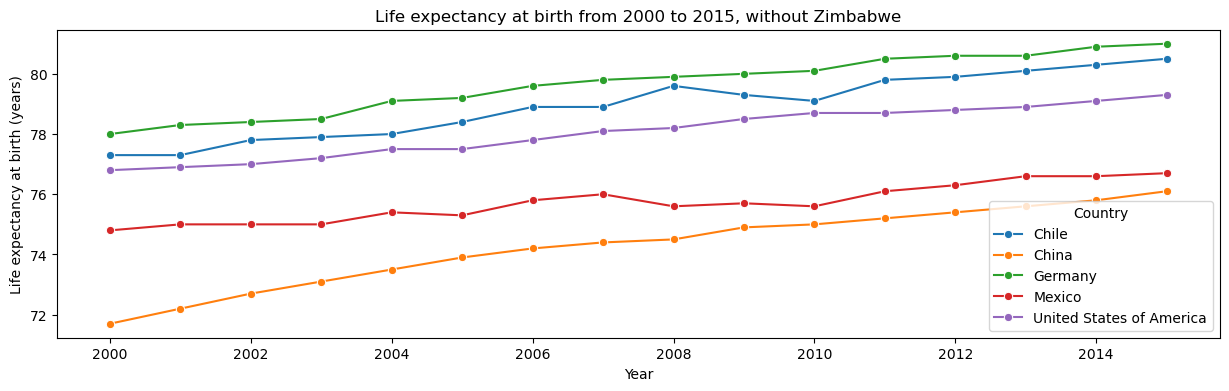

<Figure size 640x480 with 0 Axes>

In [556]:
#Recreating the same graph without Zimbabwe
df_no_zimbabwe = df[~df['Country'].isin(['Zimbabwe'])]

plt.figure(figsize=(15,4))
sns.lineplot(data=df_no_zimbabwe, x='Year', y='Expectancy', hue='Country', marker='o')
plt.title('Life expectancy at birth from 2000 to 2015, without Zimbabwe')
plt.ylabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

This closer view definitely helps understand the evolution of each countries' life expectancy, but it would be interesting to compare the 6 countries in separate graphs.

In [574]:
#Creating a fonction to plot each country's life expectancy seperately
def plot_expectancy(country, plot):
    ax = plt.subplot(2, 3, plot)
    sns.lineplot(data=df[df['Country'].isin([country])], x='Year', y='Expectancy', marker='o')
    plt.title(country)
    plt.ylabel('Life expectancy at birth (years)')
    #Adding a range for the Y axe for easier comparison, with a condition for Zimbabwe which has a shorter life expectancy
    if country == 'Zimbabwe':
        ax.set_yticks(range(44, 64))
    else :
        ax.set_yticks(range(70, 90))

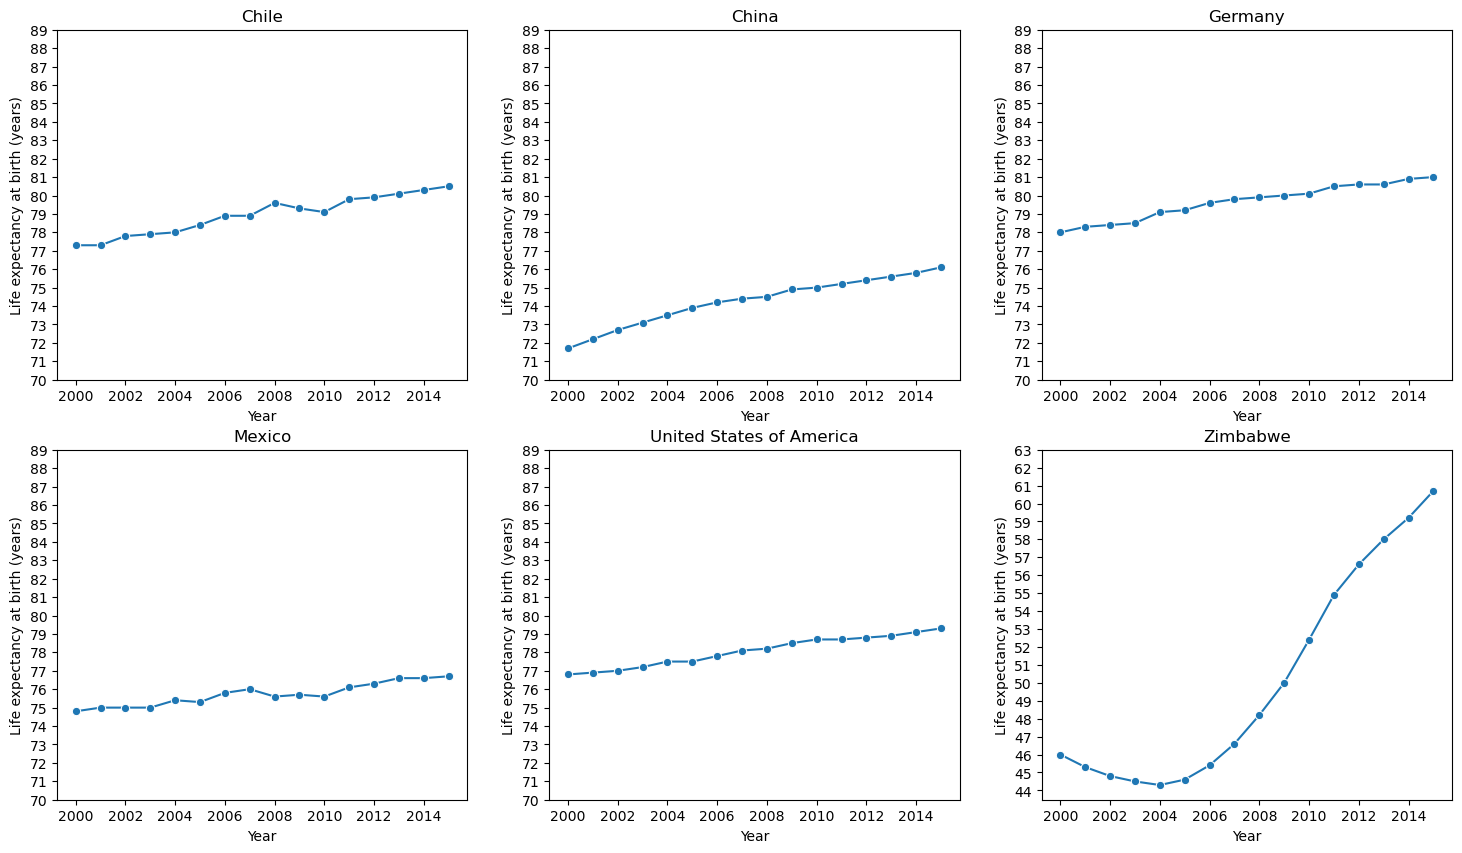

In [586]:
#Plotting each country using our fonction
plt.figure(figsize = (18, 10))
plot_expectancy('Chile', 1)
plot_expectancy('China', 2)
plot_expectancy('Germany', 3)
plot_expectancy('Mexico', 4)
plot_expectancy('United States of America', 5)
plot_expectancy('Zimbabwe', 6)

In these line graphs, we can see more precisely each country's life expectancy evolution. Each line has been graphed Y axe (life expectancy) from 70 to 90, while Zimbabwe's axe is ranging from 44 to 64, because of its overall shorter expectancy.

**Observations**

- Each country's life expectancy has been growing during the 16 years recorded.
- Germany has the highest life expectancy, both at the start and the end of the record.
- Zimbabwe has the shortest life expectancy, but it has grown the most.
- Zimbabwe's life expectancy went down from 2000 to 2004 before going up.

## Gross Domestic Product (GDP) ##
Now that we have a better idea of the different countries' life expectancy and their evolution over the years, let's look at the same countries' GDP and their impacts. 

In [562]:
#Printing the mean, minimum and maximum of the column "GDP" from every country
print('GDP')
print(df.groupby('Country')['GDP'].describe().drop(['count','25%', '50%', '75%', 'std'], axis=1))

GDP
                                  mean           min           max
Country                                                           
Chile                     1.697888e+11  6.973681e+10  2.783840e+11
China                     4.957714e+12  1.211350e+12  1.106470e+13
Germany                   3.094776e+12  1.949950e+12  3.890610e+12
Mexico                    9.766506e+11  6.836480e+11  1.298460e+12
United States of America  1.407500e+13  1.030000e+13  1.810000e+13
Zimbabwe                  9.062580e+09  4.415703e+09  1.630467e+10


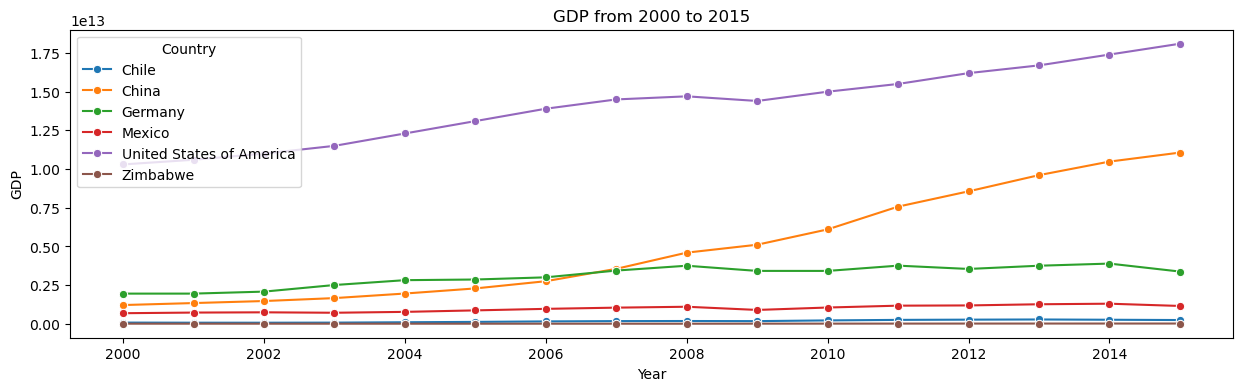

<Figure size 640x480 with 0 Axes>

In [564]:
#Creating a line graph for GDP by countries
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP from 2000 to 2015')
plt.show()
plt.clf()

In [576]:
#Creating a fonction to plot each country's GDP seperately
def plot_gdp(country, plot):
    ax = plt.subplot(2, 3, plot)
    sns.lineplot(data=df[df['Country'].isin([country])], x='Year', y='GDP', marker='o')
    plt.title(country)
    plt.ylabel('GDP')

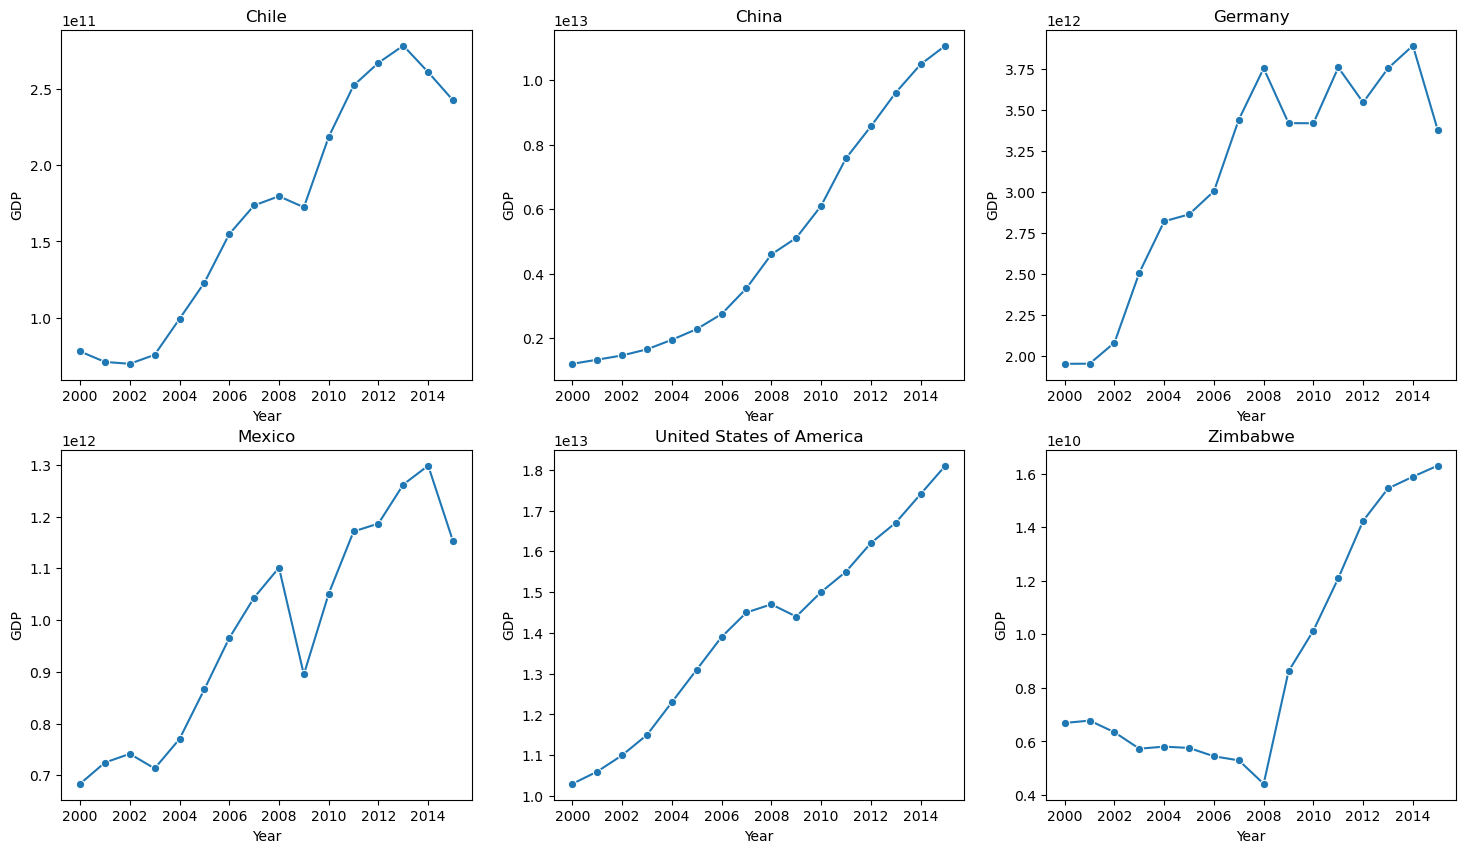

In [588]:
#Plotting each country using our fonction
plt.figure(figsize = (18, 10))
plot_gdp('Chile', 1)
plot_gdp('China', 2)
plot_gdp('Germany', 3)
plot_gdp('Mexico', 4)
plot_gdp('United States of America', 5)
plot_gdp('Zimbabwe', 6)

In these line graphs, we can see more each country's GDP evolution throughout the years. Each graph has different Y ticks to better adapt to each country. 

**Observations**

- Each country's GDP has been mostly growing during the 16 years recorded.
- The United States of America has a significantly higher GDP than any other country from our dataset.
- Zimbabwe has the lowest GDP from the dataset.
- Zimbabwe's GDP has been going down from 2001 to 2008, but has been growing rapidly from 2008 to 2015.
- Mexico, Chile and Germany have had a minor set back in the last year recorded.
- Every country except China have seen their GDP went down during the 2008 financial crisis.
- China's GDP grew the most in the years recorded. 

## GDP and life expectancy : any correlation? ##

After our initial observations on both the life expectancy at birth and the GDP of the 6 countries throughout the years, correlation is a question worth asking. Visualizing GDP against the life expectancy for 6 vastly different countries does not seem very clear to analyze, yet we can definitely observe some patterns.

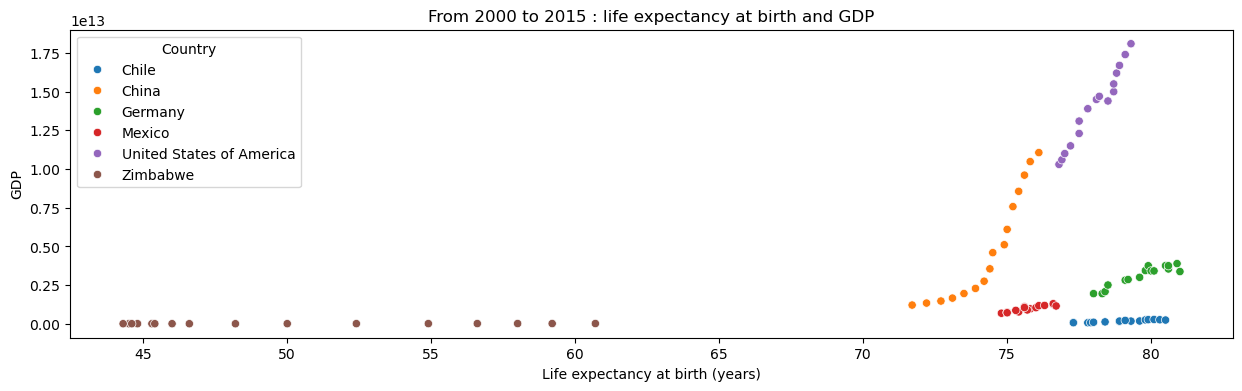

<Figure size 640x480 with 0 Axes>

In [570]:
#Creating a scatter chart of GDP and life expectancy throughout the years
plt.figure(figsize=(15,4))
sns.scatterplot(data=df, x='Expectancy', y='GDP', hue='Country')
plt.title('From 2000 to 2015 : life expectancy at birth and GDP')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP')
plt.show()
plt.clf()

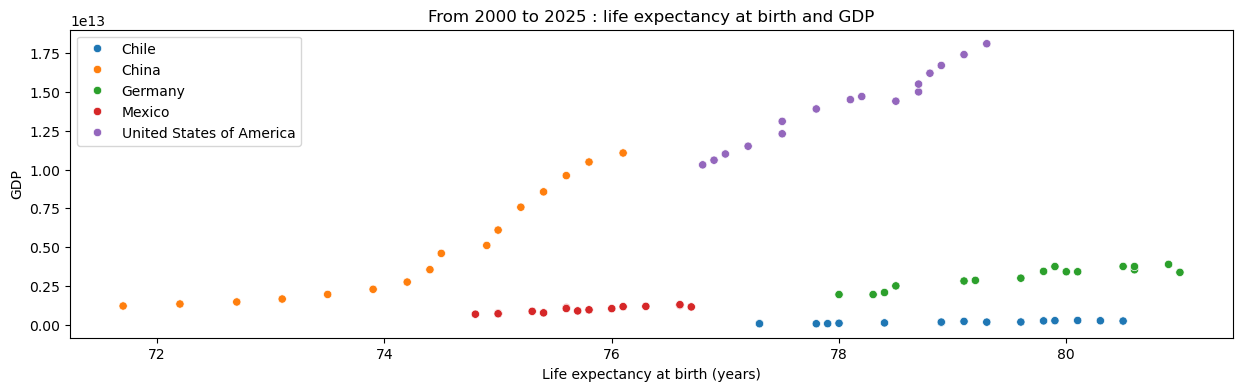

<Figure size 640x480 with 0 Axes>

In [572]:
#Recreating the same graph without Zimbabwe
plt.figure(figsize=(15,4))
sns.scatterplot(data=df_no_zimbabwe, x='Expectancy', y='GDP', hue='Country')
plt.title('From 2000 to 2025 : life expectancy at birth and GDP')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP')
plt.legend(loc=2)
plt.show()
plt.clf()

In [578]:
#Creating a fonction to plot each country's GDP against life expectancy seperately
def plot_gdp_life(country, plot):
    ax = plt.subplot(2, 3, plot)
    sns.scatterplot(data=df[df['Country'].isin([country])], x='Expectancy', y='GDP')
    plt.title(country)
    plt.ylabel('GDP')
    plt.xlabel('Life expectancy at birth')

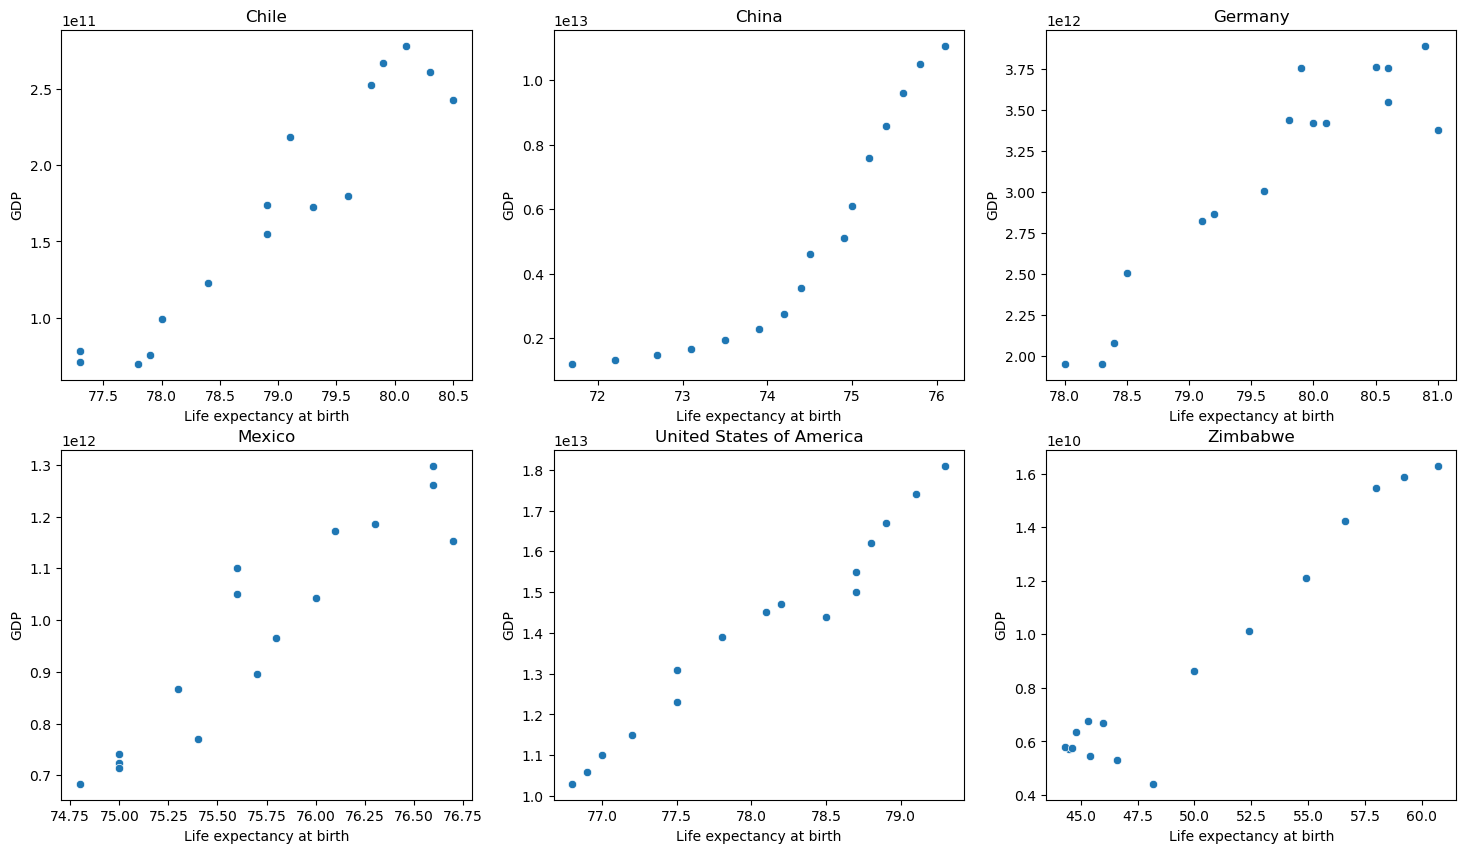

In [582]:
#Plotting each country using our fonction
plt.figure(figsize = (18, 10))
plot_gdp_life('Chile', 1)
plot_gdp_life('China', 2)
plot_gdp_life('Germany', 3)
plot_gdp_life('Mexico', 4)
plot_gdp_life('United States of America', 5)
plot_gdp_life('Zimbabwe', 6)

It is important to note that these last graphs are hard to analyze because of their vastly different x and y axes, but here is what we can still observe : 

**Observations**

- Every country shows a strong correlation throughout the 16 years : with low GDP associated with short life expectancy and high GDP associated with longer life expectancy.  
- While the USA has by far the highest GDP, it ranks in the middle when it comes to life expectancy.
- China has the second highest GDP, but the second shortest life expectancy. 
- Chile has the second lowest GDP, but it has the second longest life expectancy.
- Half the countries don't have their longest life expectancy and their highest GDP in the same year.


## Conclusion ##

While we can observe correlation between the gross domestic product (GDP) and life expectancy at birth for all 6 countries, we can not conclude that one impact another. Some data even seem to contradict this correlation : indeed, while the USA has a very higher GDP above all other countries from our dataset, it only ranks third for its life expectancy. China also has a much higher GDP, especially in the last 5 years recorded, but its life expectancy is the second shortest. On the other hand, Germany and Chile have the longest life expectancy but have both much lower GDP compared to China and the USA. 

One question worth asking is if the GDP is a biased factor, in so that it does not take into account the repartition of capital throughout the population. This might explain why the USA and China don't have particularly long life expectancy : while having a very good GDP, their wealth are not equally distributed. For example, in 2010, 50% Americans only owned about 1% of all USA's wealth, while the 10% most richest households held about 70% of it all (The Federal Reserve System, 2024).

Considering both GDP and life expectancy have both shown growth for each of the 6 countries throughout the 16 years recorded, we might want to ponder if this growth might just be a result of the time (health researches advancing, better technologies, better health care, ect.) instead of a real correlation between GDP and life expectancy. 

To prove or disprove this correlation, further research would be necessary. It would be interesting to include other countries' data to expend our analysis, maybe comparing countries from the same continent to find any patterns. Analysing other variables like access to health care would also deepen our understanding of the seemingly worldwide life expectancy's growth. 